In [1]:
import pandas as pd
import numpy as np
import string, re

pd.options.display.max_rows = 50

## Cleaning CSV Files

**Read in Data**

In [2]:
df1 = pd.read_csv('data/glassdoor_ratings1_62.csv')
df2 = pd.read_csv('data/glassdoor_ratings2_37.csv')
df3 = pd.read_csv('data/glassdoor_ratings3_199.csv')
df4 = pd.read_csv('data/glassdoor_ratings5_797.csv')
df5 = pd.read_csv('data/glassdoor_ratings6_846.csv')
df6 = pd.read_csv('data/glassdoor_ratings7_453.csv')  
df7 = pd.read_csv('data/glassdoor_ratings8_873.csv') #scrape # 8

#Combine data frames
data = pd.concat([df1, df2, df3, df4, df5, df6, df7])

print('Length of data set: ',len(data))
print('Number of duplicates: ', data['NAME'].duplicated().sum())

Length of data set:  3268
Number of duplicates:  1246


### Initial Cleaning
 - Handle null values
 - reset indices 
 - drop duplicates

In [3]:
## CHECK TO BE SURE THIS DOESNT NEED TO HAPPEN EARLIER

#Reset index to see all rows
data.reset_index(inplace=True)


In [4]:
# #change '  ' to null values
# data['FULL_DESCRIPTION'] = data['FULL_DESCRIPTION'].mask(data['FULL_DESCRIPTION']== '  ')

In [5]:
#Drop null values from RATING_DI
print('NaN values dropped from RATING_DI: ', data.RATING_DI.isna().sum())
data.dropna(subset=['RATING_DI'], inplace=True)

#Drop null values from DESCRIPTION
print('NaN values dropped from DESCRIPTION: ', data.DESCRIPTION.isna().sum())
data.dropna(subset=['DESCRIPTION'], inplace=True)




NaN values dropped from RATING_DI:  153
NaN values dropped from DESCRIPTION:  90


In [6]:
print('Number of duplicates: ', data['NAME'].duplicated().sum())
print('NaN values dropped from DESCRIPTION: ', data.DESCRIPTION.isna().sum())


Number of duplicates:  1088
NaN values dropped from DESCRIPTION:  0


In [7]:
#Drop duplicate companies by 'NAME' - drops size from 1941 to 1188
data.drop_duplicates(subset='NAME', keep='last', inplace=True)
data = data.drop(['index'], axis=1)

In [8]:
### RESET INDEX HERE TO NAME ### (easier searching?)
data = data.set_index('NAME')

In [9]:
# #reset index to begin at 0
# ###data.reset_index(inplace=True)

# #drop extra indices
# # data = data.drop(['index', 'level_0'], axis=1)
# data = data.drop(['index'], axis=1)


In [10]:
#Check out dataframe
print('Shape: ', data.shape)
data.head()

Shape:  (1937, 13)


,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION
NAME,,,,,,,,,,,,,
McKinsey & Company,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,"See All 5,198 Reviews",We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...
Cornell University,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,"See All 1,765 Reviews","Cornell is a private, Ivy League university re...",NaN
UC Santa Barbara,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,"See All 1,049 Reviews","Dude, let's hit the beach! And then we'll hit ...",NaN
UC Irvine,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,"See All 1,398 Reviews","Sun, the beach, Nobel Prize winners, and a Sou...",NaN
Iowa State University,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,"See All 1,203 Reviews",Attending Iowa State University of Science and...,NaN


### Inspecting data distribution

In [11]:
##inspect size column
data.SIZE.value_counts()


1001 to 5000 Employees     858
10000+ Employees           712
5001 to 10000 Employees    356
501 to 1000 Employees        5
Unknown                      4
51 to 200 Employees          1
201 to 500 Employees         1
Name: SIZE, dtype: int64

In [12]:
data.INDUSTRY.value_counts().to_frame()

,INDUSTRY
Health Care Services & Hospitals,213
Colleges & Universities,155
Computer Hardware & Software,76
Insurance Carriers,63
IT Services,62
...,...
Charter Air Travel,1
Farm Support Services,1
Toy & Hobby Stores,1
$2 to $5 billion (USD),1


### New column adding Description and Mission together 

In [13]:
# change null values in MISSION and DESCRIPTION to ' '
data['MISSION'].fillna(' ', inplace=True)
data['DESCRIPTION'].fillna(' ', inplace=True)

data['FULL_DESCRIPTION'] = np.add(data['DESCRIPTION'], data['MISSION'])

data.head()

,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION
NAME,,,,,,,,,,,,,,
McKinsey & Company,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,"See All 5,198 Reviews",We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...
Cornell University,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,"See All 1,765 Reviews","Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re..."
UC Santa Barbara,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,"See All 1,049 Reviews","Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ..."
UC Irvine,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,"See All 1,398 Reviews","Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou..."
Iowa State University,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,"See All 1,203 Reviews",Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...


In [14]:
### WORK ON THIS ###
# how to add a space before "Mission:"??

### Clean up NUM_REVIEWS
- return numbers only

In [15]:
def get_digits(s):
    #remove commas
    exclude = set(string.punctuation)
    s = ''.join(num for num in s if num not in exclude)

    #return digits only
    return s.split()[2]

In [16]:
#apply function to NUM_REVIEWS and change datatype to int
data['NUM_REVIEWS'] = data['NUM_REVIEWS'].apply(get_digits).astype(int)

In [17]:
#removing companies with too few reviews
data = data[(data['NUM_REVIEWS'] > 100)]

### New Column basted on RATING_DI

**drop lower than xx reviews**

In [18]:
# Checking out rating stats
data.describe()

,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS
count,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000
mean,3.899064,3.985655,3.814085,3.694335,3.460863,3.682848,3.593399,1216.289501
std,0.299122,0.429166,0.380497,0.392565,0.388888,0.403465,0.366290,2710.347067
min,2.400000,1.000000,1.900000,1.700000,1.900000,2.300000,2.300000,101.000000
25%,3.700000,3.700000,3.600000,3.400000,3.200000,3.400000,3.300000,243.000000
50%,3.900000,4.000000,3.800000,3.700000,3.400000,3.700000,3.600000,460.500000
75%,4.100000,4.300000,4.100000,4.000000,3.700000,3.900000,3.800000,1225.250000
max,4.900000,5.000000,5.000000,4.900000,4.900000,4.900000,4.800000,74411.000000


In [19]:
threshold = data.RATING_DI.mean()
threshold

3.9856548856548857

In [20]:
print('Percentage of companpies below threshold:', 
      (len(data[(data['RATING_DI'] < 4.0)]) / (len(data)))*100)
print('Percentage of companpies above threshold:', 
      (len(data[(data['RATING_DI'] > 4.0)]) / (len(data)))*100)

Percentage of companpies below threshold: 43.555093555093556
Percentage of companpies above threshold: 46.1018711018711


In [21]:
##PIE
# names = df.country.unique()
# values = df.groupby(['country'])['share_global_co2'].mean()

# # Visualize top CO2 contributers 
# fig = px.pie(df, values=values, names=names,
#       title = 'CO2 Emissions by Country')
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.update_layout(showlegend=False)
# fig.show()


In [22]:
# New column for Target variable - companies with Diversity and Inclusion Rating over 4.0
data['TARGET'] = np.where(data['RATING_DI'] > 4.0 , 1, 0)

## Save data CSV

In [23]:
data.to_csv('data/glassdoor_ratings_main.csv', index=False)

In [24]:
data.head()

,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET
NAME,,,,,,,,,,,,,,,
McKinsey & Company,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...,1
Cornell University,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re...",1
UC Santa Barbara,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ...",1
UC Irvine,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou...",1
Iowa State University,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, McKinsey & Company to First American Financial Corporation
Data columns (total 15 columns):
SIZE                1924 non-null object
LOCATION_HQ         1924 non-null object
INDUSTRY            1924 non-null object
RATING_OVERALL      1924 non-null float64
RATING_DI           1924 non-null float64
RATING_CV           1924 non-null float64
RATING_WL           1924 non-null float64
RATING_SM           1924 non-null float64
RATING_CB           1924 non-null float64
RATING_CO           1924 non-null float64
NUM_REVIEWS         1924 non-null int64
DESCRIPTION         1924 non-null object
MISSION             1924 non-null object
FULL_DESCRIPTION    1924 non-null object
TARGET              1924 non-null int64
dtypes: float64(7), int64(2), object(6)
memory usage: 240.5+ KB


## Create and save DTM 
- Document Term Matrix

In [26]:
# # We can either keep it in dictionary format or put it into a pandas dataframe
# import pandas as pd
# pd.set_option('max_colwidth',150)

# data_df = pd.DataFrame.from_dict(data_combined).transpose()
# data_df.columns = ['transcript']
# data_df = data_df.sort_index()
# data_df

In [27]:
data.columns

Index(['SIZE', 'LOCATION_HQ', 'INDUSTRY', 'RATING_OVERALL', 'RATING_DI',
       'RATING_CV', 'RATING_WL', 'RATING_SM', 'RATING_CB', 'RATING_CO',
       'NUM_REVIEWS', 'DESCRIPTION', 'MISSION', 'FULL_DESCRIPTION', 'TARGET'],
      dtype='object')

In [28]:
# ## setting stopwords and punctuations
# sw_list = stopwords.words('english')
# sw_list += list(string.punctuation) #appending to stopwords
# sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',
#             '-', '–', '—', '--', "'s", 'e.g', "'ll",
#             'company', 'services', 'world', 'people', 'care', 'health', 'us',
#            ]

# sw_set = set(sw_list) #list of stop words
# #sw_set #Sanity Check

In [29]:
# sw_set

In [30]:
import re

**Cleaning Description**

In [87]:
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [101]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    # make text lowercase
    text = text.lower()
    # remove numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove punctuation and symbols
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('™', '', text)
    # remove quotation marks
    text = re.sub('\"+', '', text)
    
    # remove single letter characters
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # if there's a new line, change to a whitespace
    text = re.sub('\n', ' ', text)
    
    return text

In [102]:
# apply data cleaning function to 'FULL_DESCRIPTION' column
data['CLEAN_DESCRIPTION'] = data['FULL_DESCRIPTION'].apply(clean_text)

In [103]:
# # applying the above function to our data/features with map() method
# processed_data = list(map(process_description, df.FULL_DESCRIPTION))

In [107]:
data.CLEAN_DESCRIPTION[912
                    
                    
                      ]

'the shriners red fez and miniscooter parades are the goofy side to their very serious support of the shriners hospitals for children the system operates nearly two dozen hospitals throughout north america the majority of its hospitals specialize in orthopedic conditions others specialize in treating serious burn injuries spinal cord injuries and cleft lips and palates founded by the fellowship shriners international the hospitals are supported by  multitude of fundraising events arranged by the organizations  members as  result shriners hospitals are able to treat children regardless of their families ability to pay shriners hospitals for children was founded in  '

## EDA

Feature engineering for EDA:
 - bin: RATING (4 categories), NUM_REVIEWS
 - create continuous variables for SIZE
 - new col for length of description, mission
 - new col for HQ_STATE
 
 Notes:
 - continuous variables: SIZE, RATING, NUM_REVIEWS


In [34]:
data['RATING_DI_BIN'] = data.RATING_DI.astype(float)

In [35]:
data.head()

,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET,CLEAN_DESCRIPTION,RATING_DI_BIN
NAME,,,,,,,,,,,,,,,,,
McKinsey & Company,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...,1,we work with leaders across sectors to tackle ...,4.4
Cornell University,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re...",1,cornell is a private ivy league university rec...,4.3
UC Santa Barbara,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ...",1,dude lets hit the beach and then well hit the ...,4.2
UC Irvine,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou...",1,sun the beach nobel prize winners and a southe...,4.5
Iowa State University,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...,1,attending iowa state university of science and...,4.2


In [36]:
data.SIZE.value_counts()

1001 to 5000 Employees     848
10000+ Employees           710
5001 to 10000 Employees    355
501 to 1000 Employees        5
Unknown                      4
51 to 200 Employees          1
201 to 500 Employees         1
Name: SIZE, dtype: int64

In [37]:
## list of conditions you want to test
conditions = [ 
    data['SIZE'] == '10000+ Employees',
    data['SIZE'] == '1001 to 5000 Employees',
    data['SIZE'] == '5001 to 10000 Employees', 
    ((data['SIZE'] == '501 to 1000 Employees')|(data['SIZE'] == '201 to 500 Employees')| (data['SIZE'] == '51 to 200 Employees'))] 

## list of choices to be returned if said condition is True
choices = [ 
    4,
    3,
    2,
    1]

data['SIZE_BIN'] = np.select(conditions, choices, default=None)

#Convert to float
data['SIZE_BIN'] = data['SIZE_BIN'].astype(float)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, McKinsey & Company to First American Financial Corporation
Data columns (total 18 columns):
SIZE                 1924 non-null object
LOCATION_HQ          1924 non-null object
INDUSTRY             1924 non-null object
RATING_OVERALL       1924 non-null float64
RATING_DI            1924 non-null float64
RATING_CV            1924 non-null float64
RATING_WL            1924 non-null float64
RATING_SM            1924 non-null float64
RATING_CB            1924 non-null float64
RATING_CO            1924 non-null float64
NUM_REVIEWS          1924 non-null int64
DESCRIPTION          1924 non-null object
MISSION              1924 non-null object
FULL_DESCRIPTION     1924 non-null object
TARGET               1924 non-null int64
CLEAN_DESCRIPTION    1924 non-null object
RATING_DI_BIN        1924 non-null float64
SIZE_BIN             1920 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 285.6+ KB


In [39]:
data.head()

,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET,CLEAN_DESCRIPTION,RATING_DI_BIN,SIZE_BIN
NAME,,,,,,,,,,,,,,,,,,
McKinsey & Company,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...,1,we work with leaders across sectors to tackle ...,4.4,4.0
Cornell University,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re...",1,cornell is a private ivy league university rec...,4.3,4.0
UC Santa Barbara,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ...",1,dude lets hit the beach and then well hit the ...,4.2,2.0
UC Irvine,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou...",1,sun the beach nobel prize winners and a southe...,4.5,4.0
Iowa State University,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...,1,attending iowa state university of science and...,4.2,2.0


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data.describe()

,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,TARGET,RATING_DI_BIN,SIZE_BIN
count,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1920.000000
mean,3.899064,3.985655,3.814085,3.694335,3.460863,3.682848,3.593399,1216.289501,0.461019,3.985655,3.177604
std,0.299122,0.429166,0.380497,0.392565,0.388888,0.403465,0.366290,2710.347067,0.498608,0.429166,0.733490
min,2.400000,1.000000,1.900000,1.700000,1.900000,2.300000,2.300000,101.000000,0.000000,1.000000,1.000000
25%,3.700000,3.700000,3.600000,3.400000,3.200000,3.400000,3.300000,243.000000,0.000000,3.700000,3.000000
50%,3.900000,4.000000,3.800000,3.700000,3.400000,3.700000,3.600000,460.500000,0.000000,4.000000,3.000000
75%,4.100000,4.300000,4.100000,4.000000,3.700000,3.900000,3.800000,1225.250000,1.000000,4.300000,4.000000
max,4.900000,5.000000,5.000000,4.900000,4.900000,4.900000,4.800000,74411.000000,1.000000,5.000000,4.000000


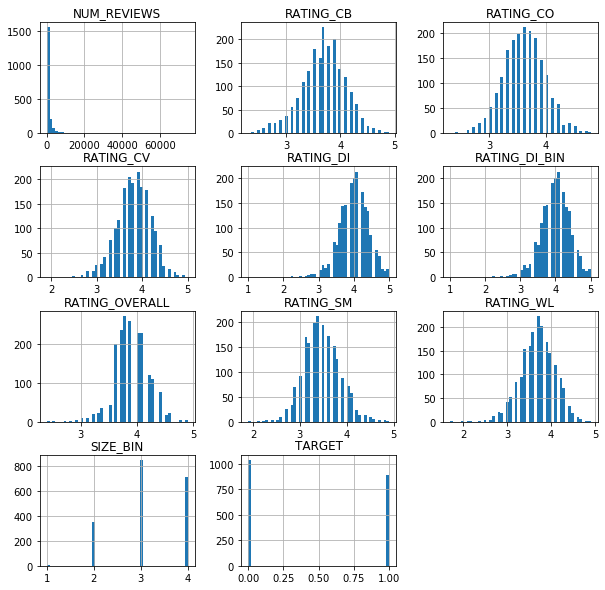

In [42]:
data.hist(bins=50, figsize=(10,10)) #sharex, sharey
plt.show()

Rating distributions are mostly normal

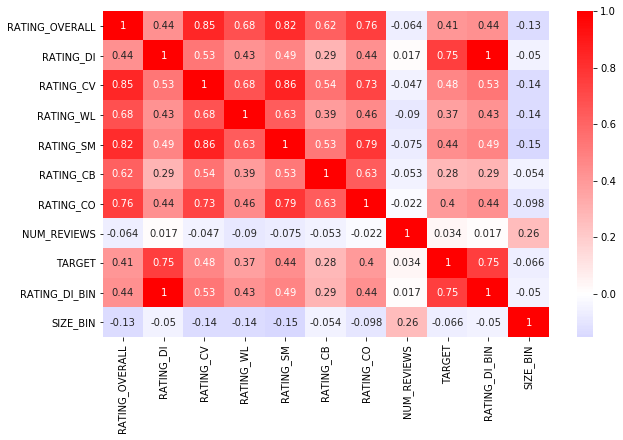

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='bwr', center=0, annot=True)

# fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

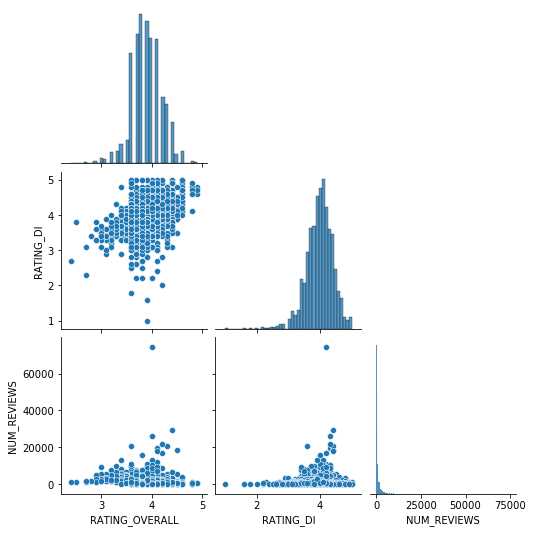

In [44]:
sns.pairplot(data[['SIZE', 'RATING_OVERALL', 'RATING_DI', 'NUM_REVIEWS']], corner=True)


In [45]:
#Bin SIZE


### Rating

In [46]:
data.RATING_DI.value_counts(bins=4)

(3.0, 4.0]      992
(4.0, 5.0]      887
(2.0, 3.0]       41
(0.995, 2.0]      4
Name: RATING_DI, dtype: int64

### Company Size

In [47]:
data.SIZE.value_counts()

1001 to 5000 Employees     848
10000+ Employees           710
5001 to 10000 Employees    355
501 to 1000 Employees        5
Unknown                      4
51 to 200 Employees          1
201 to 500 Employees         1
Name: SIZE, dtype: int64

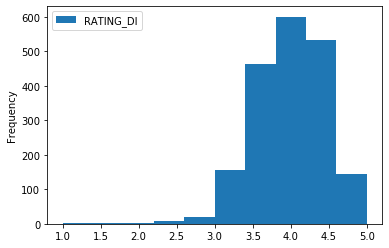

In [48]:
data.plot(kind='hist', 
          x='SIZE_BIN', 
          y='RATING_DI')
plt.show()

##make this a boxplot??

In [49]:
data.groupby('SIZE_BIN')['RATING_DI'].value_counts(normalize=True)[:50]

SIZE_BIN  RATING_DI
1.0       3.8          0.285714
          3.4          0.142857
          3.5          0.142857
          3.6          0.142857
          3.9          0.142857
          4.3          0.142857
2.0       4.1          0.126761
          4.2          0.109859
          3.9          0.107042
          3.8          0.087324
          4.0          0.087324
          4.4          0.073239
          3.7          0.064789
          4.3          0.061972
          3.6          0.053521
          4.5          0.047887
          3.4          0.033803
          4.6          0.033803
          3.5          0.022535
          3.3          0.016901
          4.7          0.014085
          3.1          0.011268
          4.8          0.011268
          3.2          0.008451
          2.8          0.005634
          2.9          0.005634
          4.9          0.005634
          1.0          0.002817
          2.2          0.002817
          3.0          0.002817
          5.0       

### Inspecting INDUSTRY

In [50]:
print('Number of industries: ', len(data.INDUSTRY.unique())) #120
list(data.INDUSTRY.unique())


Number of industries:  120


['Consulting',
 'Colleges & Universities',
 'Computer Hardware & Software',
 'Internet',
 'Enterprise Software & Network Solutions',
 'Grocery Stores & Supermarkets',
 'Health Care Services & Hospitals',
 'Biotech & Pharmaceuticals',
 'Investment Banking & Asset Management',
 'Federal Agencies',
 'Staffing & Outsourcing',
 'Cruise Ships',
 'IT Services',
 'Fast-Food & Quick-Service Restaurants',
 'Catering & Food Service Contractors',
 'Insurance Carriers',
 'Oil & Gas Exploration & Production',
 'Hotels, Motels, & Resorts',
 'Food & Beverage Manufacturing',
 'Banks & Credit Unions',
 'Video Games',
 'Construction',
 'Convenience Stores & Truck Stops',
 'Insurance Agencies & Brokerages',
 'Real Estate',
 'Cable, Internet & Telephone Providers',
 'Energy',
 'Financial Transaction Processing',
 'Electrical & Electronic Manufacturing',
 'Casual Restaurants',
 'Food & Beverage Stores',
 'Airlines',
 'Brokerage Services',
 'Museums, Zoos & Amusement Parks',
 'Sporting Goods Stores',
 'TV Br

In [51]:
#Top 50 with value counts
data.INDUSTRY.value_counts()[:50].to_frame()

,INDUSTRY
Health Care Services & Hospitals,211
Colleges & Universities,154
Computer Hardware & Software,76
Insurance Carriers,61
IT Services,61
Enterprise Software & Network Solutions,57
Investment Banking & Asset Management,53
Consumer Products Manufacturing,52
Staffing & Outsourcing,46
Banks & Credit Unions,45


### Description

In [52]:
# #How to check average length of description??
# len(data['DESCRIPTION'][4])

### Notes

Extras:
- clean SIZE (bin as a continuous variable)
- inspect industries
- scatterplots: DI rating OR target vs # of reviews, industry, state, company size
- test new scraper on "Retail"

Stretch:
- new column called STATE (map?)
    - OR map out the cities for a map
- EDA: are larger companies more likely to be inclusive?
